# Exploratory Data Analysis (EDA)  
## ClinVar Conflicting Variant Classification

In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../data/raw/clinvar_conflicting.csv',
                 dtype={'CHROM': str})

In [ ]:
# Dataset Overview
print("\n--- SHAPE ---")
print(df.shape)

print("\n--- INFO ---")
df.info()



--- SHAPE ---
(65188, 46)

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC          

In [43]:
df.head(15)

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,CLNDNINCL,CLNHGVS,CLNSIGINCL,CLNVC,CLNVI,MC,ORIGIN,SSR,CLASS,Allele,Consequence,IMPACT,SYMBOL,Feature_type,Feature,BIOTYPE,EXON,INTRON,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,DISTANCE,STRAND,BAM_EDIT,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.1168180G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q96L58#VAR_059317,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,B3GALT6,Transcript,NM_080605.3,protein_coding,1/1,NaN,552,522,174,E/D,gaG/gaC,NaN,1.0,NaN,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,NaN,NC_000001.10:g.1470752G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:616101.0001|UniProtKB_(pr...,SO:0001583|missense_variant,1,NaN,0,A,missense_variant,MODERATE,TMEM240,Transcript,NM_001114748.1,protein_coding,4/4,NaN,523,509,170,P/L,cCg/cTg,NaN,-1.0,OK,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,NaN,NC_000001.10:g.1737942A>G,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:139380.0002|UniProtKB_(pr...,"SO:0001583|missense_variant,SO:0001623|5_prime...",35,NaN,1,G,missense_variant,MODERATE,GNB1,Transcript,NM_002074.4,protein_coding,6/12,NaN,632,239,80,I/T,aTc/aCc,NaN,-1.0,OK,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160305G>A,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0004|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,A,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/S,Ggc/Agc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,NaN,NC_000001.10:g.2160305G>T,NaN,single_nucleotide_variant,OMIM_Allelic_Variant:164780.0005|UniProtKB_(pr...,SO:0001583|missense_variant,33,NaN,0,T,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,132,100,34,G/C,Ggc/Tgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0
5,1,2160554,G,C,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,NaN,NC_000001.10:g.2160554G>C,NaN,single_nucleotide_variant,UniProtKB_(protein):P12755#VAR_071183,SO:0001583|missense_variant,33,NaN,0,C,missense_variant,MODERATE,SKI,Transcript,XM_005244775.1,protein_coding,1/7,NaN,381,349,117,G/R,Ggc/Cgc,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.700,4.079099,-2.0
6,1,3328358,T,C,0.0000,0.00000,0.0000,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328358T>C,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031433,SO:0001583|missense_variant,1,NaN,0,C,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,1858,1600,534,S/P,Tcg/Ccg,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,0.172,-0.543433,-1.0
7,1,3328659,C,T,0.1523,0.13103,0.1060,MedGen:CN169374,NaN,not_specified,NaN,NC_000001.10:g.3328659C>T,NaN,single_nucleotide_variant,UniProtKB_(protein):Q9HAZ2#VAR_031434,SO:0001583|missense_variant,1,NaN,0,T,missense_variant,MODERATE,PRDM16,Transcript,XM_005244772.1,protein_coding,9/17,NaN,2159,1901,634,P/L,cCt/cTt,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.101,23.000,3.424422,-3.0
8,1,3347452,G,A,0.0000,0.00357,0.0030,"MedGen:C3809288,OMIM:615373|MedGen:CN169374|Me...",NaN,Left_ventricular_noncompaction_8|not_specified...,NaN,NC_000001.10:g.3347452G

## Distribucio de la variable objectiu (CLASS)

El grafic mostra un desbalanceig on **CLASS=0** es majoritaria (~75%) i **CLASS=1** representa ~25%.


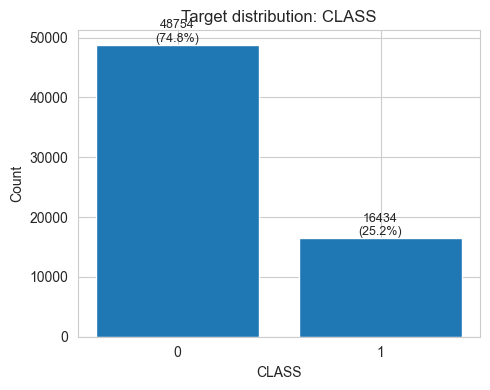

In [48]:
# Target distribution
counts = df["CLASS"].value_counts().sort_index()
pct = df["CLASS"].value_counts(normalize=True).sort_index() * 100

plt.figure(figsize=(5, 4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Target distribution: CLASS")
plt.xlabel("CLASS")
plt.ylabel("Count")
for i, v in enumerate(counts.values):
    plt.text(i, v, f"{v}\n({pct.iloc[i]:.1f}%)", ha="center", va="bottom", fontsize=9)
plt.tight_layout()
plt.show()


## Missing values globals

L’anàlisi dels valors perduts permet avaluar la qualitat i completitud del dataset. El gràfic de percentatge de valors absents mostra que diverses variables presenten una proporció molt elevada de missing values, incloent columnes amb pràcticament absència total d’informació. Aquest patró suggereix que algunes variables poden no ser útils per al modelatge i haurien de ser considerades per eliminació en la fase de preprocessament. En canvi, altres variables amb percentatges intermedis de missing, com SIFT o PolyPhen, podrien contenir informació rellevant quan estan presents, i la seva absència podria fins i tot tenir valor informatiu. Per aquest motiu, es defineix un llindar del 95% de missing per identificar variables candidates a ser descartades en etapes posteriors.


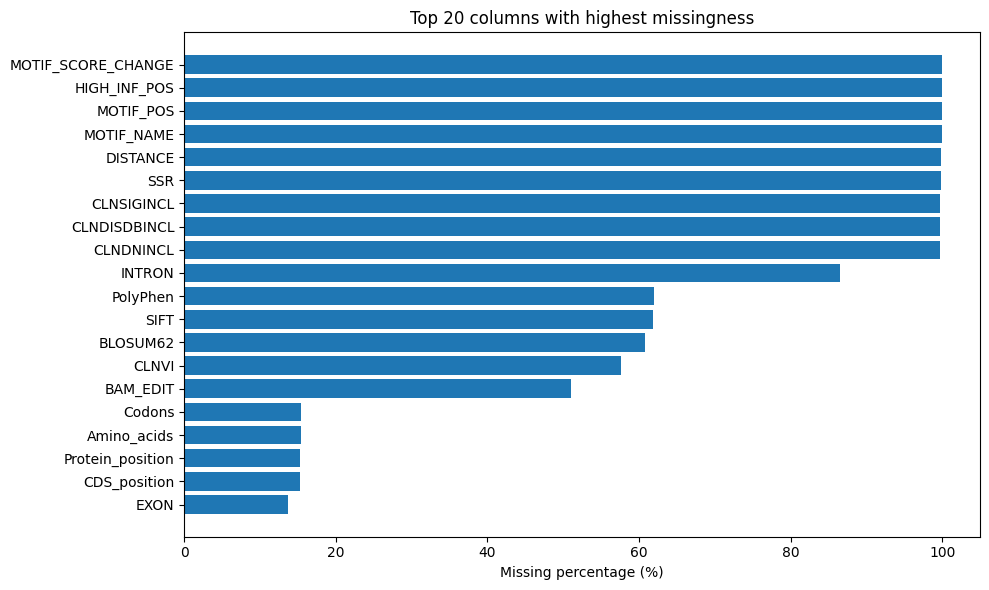


Columns with >95.0% missing: 9
['MOTIF_SCORE_CHANGE', 'HIGH_INF_POS', 'MOTIF_POS', 'MOTIF_NAME', 'DISTANCE', 'SSR', 'CLNSIGINCL', 'CLNDISDBINCL', 'CLNDNINCL']


In [ ]:
# Missing values (global)
import matplotlib.pyplot as plt

missing_tbl = (
    df.isna()
      .mean()
      .mul(100)
      .sort_values(ascending=False)
      .to_frame("missing_%")
)
missing_tbl["dtype"] = df.dtypes.astype(str)
missing_tbl["nunique"] = df.nunique(dropna=True)
missing_tbl["n_missing"] = df.isna().sum()

# Top missing columns
top_n = 20
top_missing = missing_tbl[missing_tbl["missing_%"] > 0].head(top_n).copy()

plt.figure(figsize=(10, 6))
plt.barh(top_missing.index[::-1], top_missing["missing_%"][::-1])
plt.xlabel("Missing percentage (%)")
plt.title(f"Top {top_n} columns with highest missingness")
plt.tight_layout()
plt.show()

# Columns above threshold
DROP_MISSING_THRESHOLD = 95.0
cols_drop_missing = missing_tbl.index[missing_tbl["missing_%"] > DROP_MISSING_THRESHOLD].tolist()
print(f"\nColumns with >{DROP_MISSING_THRESHOLD}% missing: {len(cols_drop_missing)}")
print(cols_drop_missing[:30])


## Missing Values per Classe (CLASS)

L’anàlisi del percentatge de valors absents segmentat per classe permet avaluar si la presència de missingness és homogènia o bé està associada a la variable objectiu. El gràfic mostra les variables amb major diferència absoluta de percentatge de valors perduts entre **CLASS=0** i **CLASS=1**. Diferències rellevants indiquen que l’absència d’informació no és completament aleatòria i podria estar relacionada amb el tipus de variant. Aquest comportament suggereix que la missingness podria tenir valor predictiu i, per tant, es considerarà la possibilitat d’incloure indicadors binaris de valors absents o estratègies d’imputació diferenciades en fases posteriors del preprocessament.

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/2496585074.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T


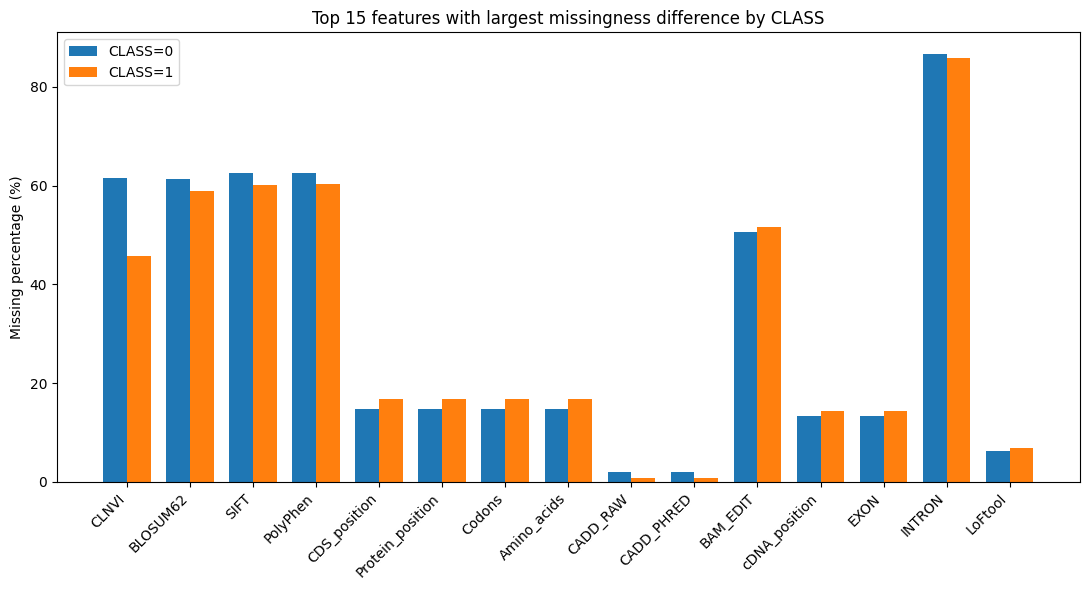

In [ ]:
# Missing values by CLASS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

target = "CLASS"

# Missing percentage by class and feature
missing_by_cls = df.groupby(target).apply(lambda g: g.isna().mean() * 100).T
missing_by_cls = missing_by_cls.drop(index=target, errors="ignore")

# Absolute difference between classes
missing_by_cls["diff_abs"] = (missing_by_cls[0] - missing_by_cls[1]).abs()

top_n = 15
top = missing_by_cls.sort_values("diff_abs", ascending=False).head(top_n)

x = np.arange(len(top.index))
width = 0.38

plt.figure(figsize=(11, 6))
plt.bar(x - width/2, top[0].values, width, label="CLASS=0")
plt.bar(x + width/2, top[1].values, width, label="CLASS=1")

plt.xticks(x, top.index, rotation=45, ha="right")
plt.ylabel("Missing percentage (%)")
plt.title(f"Top {top_n} features with largest missingness difference by CLASS")
plt.legend()
plt.tight_layout()
plt.show()


## Variables Genòmiques Bàsiques: CHROM, POS, REF i ALT

Les variables genòmiques bàsiques descriuen la localització i la naturalesa molecular de cada variant. `CHROM` identifica el cromosoma on es troba la variant, `POS` indica la seva posició exacta dins del cromosoma, mentre que `REF` i `ALT` representen respectivament l’al·lel de referència i l’al·lel alternatiu observat. Aquestes variables constitueixen la definició única de cada variant i són essencials per comprendre la seva distribució i possible relació amb la presència de conflictes en la classificació.

### Distribució de CLASS per Cromosoma

La distribució de la variable `CLASS` segons el cromosoma permet identificar si els conflictes en la classificació es concentren en determinades regions genòmiques. El gràfic mostra la freqüència de variants consistents i conflictives per cromosoma, fet que pot revelar patrons biològics o diferències en el volum de submissions entre cromosomes. Aquesta anàlisi és útil per detectar possibles concentracions anòmales de conflictes.

### Taxa de Conflicte per Cromosoma

La proporció de `CLASS=1` per cromosoma representa la taxa relativa de conflicte i permet comparar el risc de discrepància entre laboratoris en diferents cromosomes. Aquesta mesura normalitza el nombre total de variants per cromosoma i facilita una comparació més justa. Cal, però, interpretar els resultats amb cautela en cromosomes amb pocs registres, ja que petites variacions poden generar proporcions elevades.

### Distribució de la Posició Genòmica (POS)

L’histograma de la variable `POS` proporciona una visió global de la distribució de variants al llarg del genoma. Tot i que la posició genòmica per si sola no determina la presència de conflicte, pot revelar concentracions de variants en determinades regions. La interpretació d’aquesta variable ha de tenir en compte que cada cromosoma presenta una escala de longitud diferent, fet que pot influir en la densitat aparent de variants.

### Distribució dels Al·lels de Referència (REF) i Alternatius (ALT)

L’anàlisi de les freqüències dels valors més comuns de `REF` i `ALT` permet validar que la majoria de variants corresponen a substitucions simples de nucleòtids, principalment A, C, G i T. La presència minoritària de combinacions de múltiples nucleòtids indica l’existència d’insercions o delecions. Aquesta distinció és rellevant des d’un punt de vista biològic, ja que diferents tipus de variants poden tenir impactes funcionals diferenciats i, potencialment, diferents nivells de conflicte en la seva classificació.

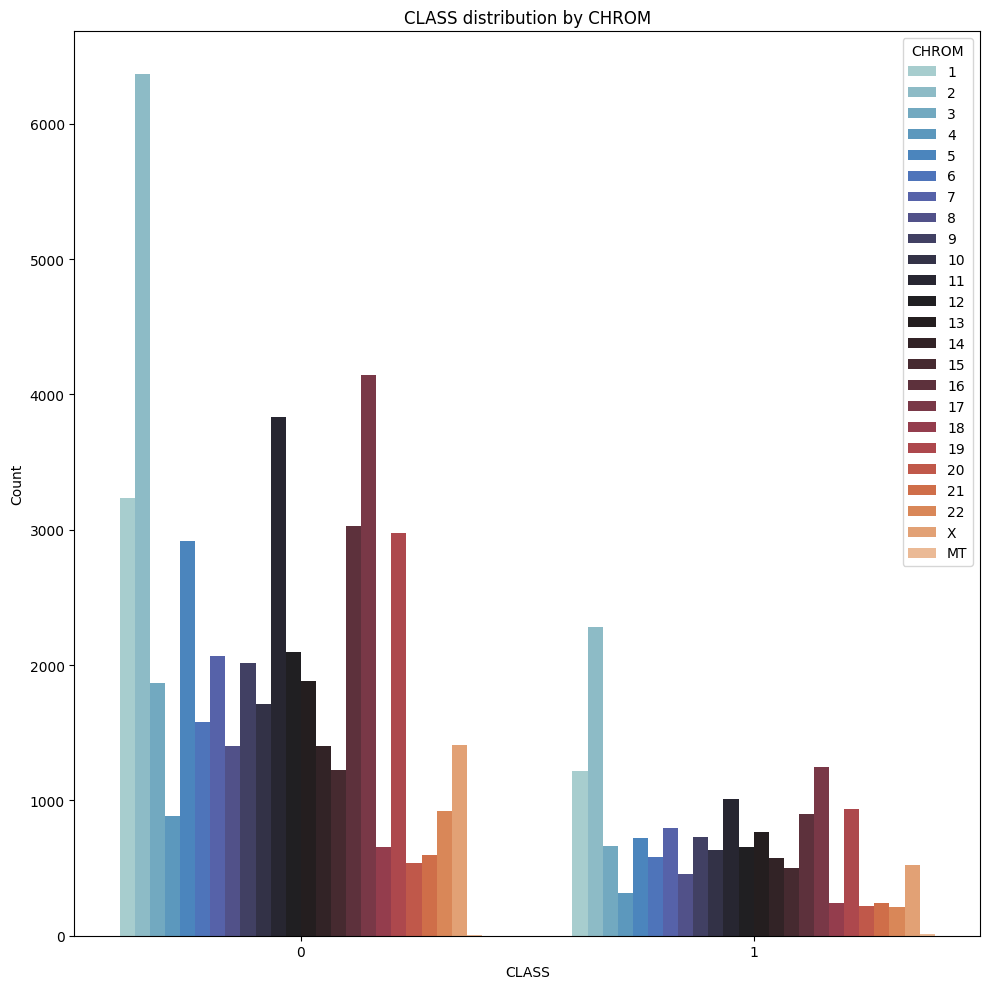

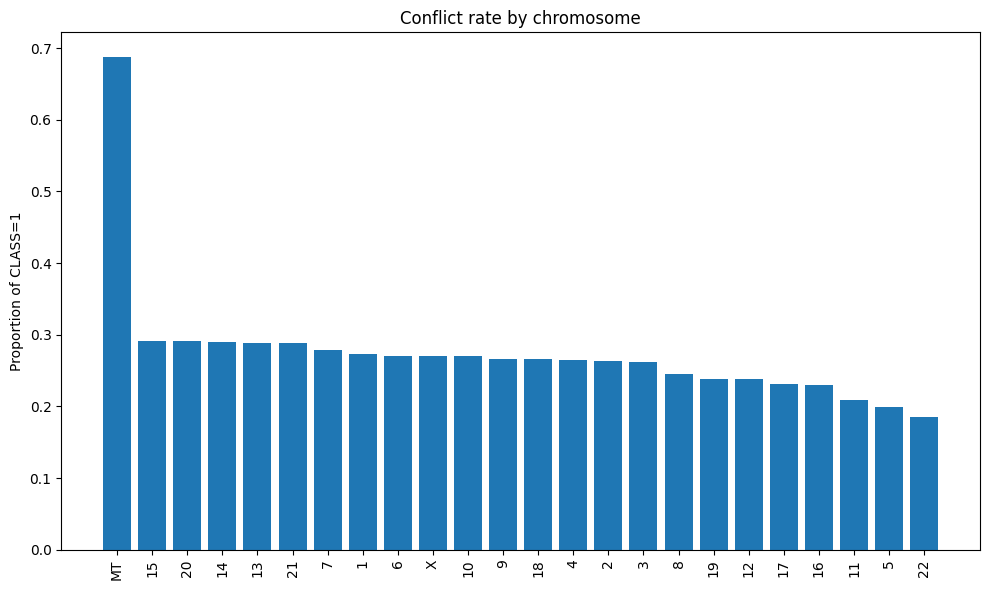

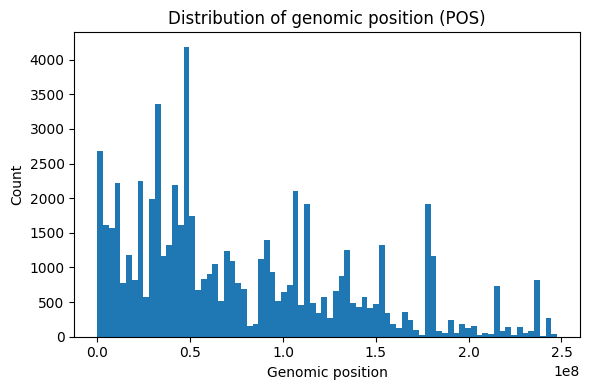

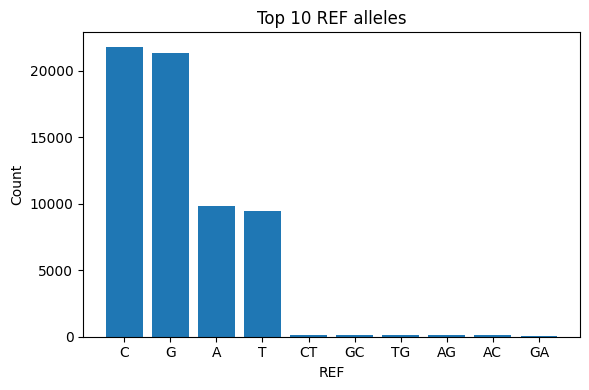

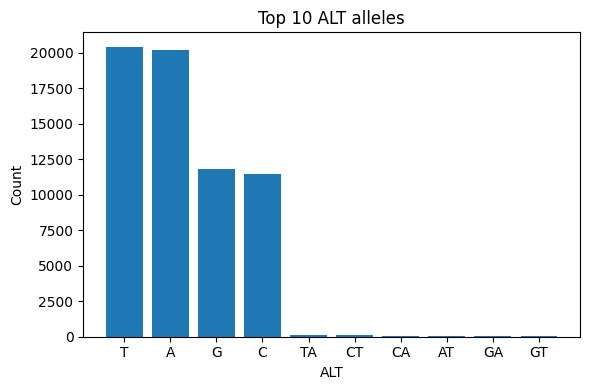

In [ ]:
# Genomic basic columns
import matplotlib.pyplot as plt
import seaborn as sns

basic_cols = ["CHROM", "POS", "REF", "ALT"]
for c in basic_cols:
    assert c in df.columns, f"Falta columna: {c}"

# CLASS count by chromosome
plt.figure(figsize=(10, 10))
sns.countplot(x="CLASS", data=df, hue="CHROM", palette="icefire")
plt.title("CLASS distribution by CHROM")
plt.xlabel("CLASS")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Conflict rate by chromosome
chrom_conflict_rate = (
    df.groupby("CHROM")["CLASS"]
      .mean()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
plt.bar(chrom_conflict_rate.index, chrom_conflict_rate.values)
plt.ylabel("Proportion of CLASS=1")
plt.title("Conflict rate by chromosome")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# POS distribution
plt.figure(figsize=(6, 4))
plt.hist(df["POS"], bins=80)
plt.title("Distribution of genomic position (POS)")
plt.xlabel("Genomic position")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top REF alleles
plt.figure(figsize=(6, 4))
ref_counts = df["REF"].value_counts().head(10)
plt.bar(ref_counts.index, ref_counts.values)
plt.title("Top 10 REF alleles")
plt.xlabel("REF")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Top ALT alleles
plt.figure(figsize=(6, 4))
alt_counts = df["ALT"].value_counts().head(10)
plt.bar(alt_counts.index, alt_counts.values)
plt.title("Top 10 ALT alleles")
plt.xlabel("ALT")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


### Distribució de les Freqüències

Els histogrames mostren que les tres variables presenten una distribució fortament asimètrica cap a la dreta, amb una elevada concentració de valors molt propers a zero. Aquest comportament és coherent amb la naturalesa del dataset, ja que la majoria de variants clíniques són rares en la població general. La forta asimetria suggereix que en fases posteriors podria ser convenient aplicar transformacions com ara escala logarítmica o discretització per reduir l’efecte de la cua llarga.

### Comparació per Classe

Els boxplots segmentats per `CLASS` permeten comparar la distribució de les freqüències al·lèliques entre variants consistents i conflictives. S’observa que, en general, les variants amb conflicte tendeixen a presentar freqüències lleugerament superiors, mentre que les variants molt rares mostren major consens en la seva classificació. Aquest patró és coherent amb la interpretació clínica habitual, segons la qual variants comunes solen ser considerades benignes amb menor controvèrsia.

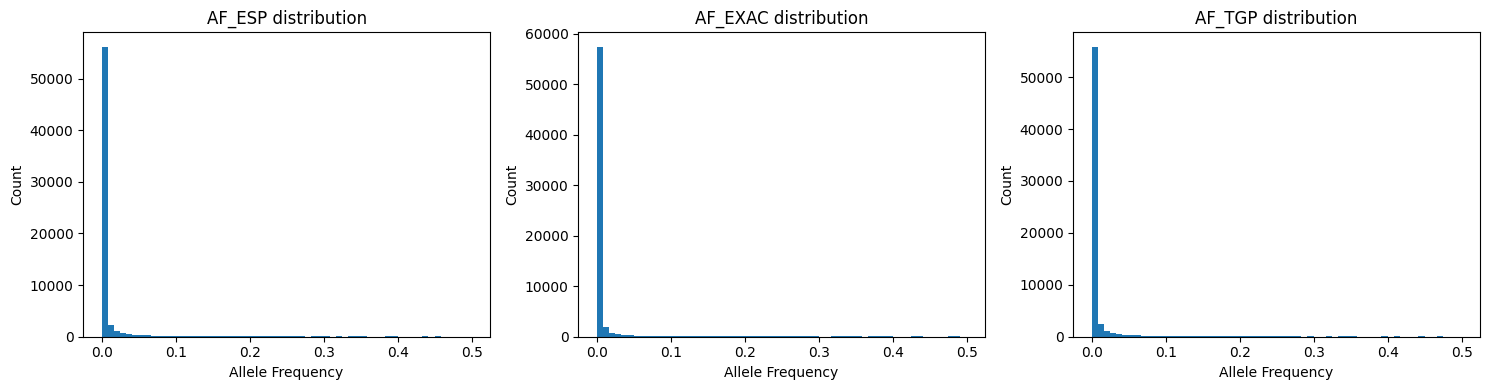

/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
/var/folders/tl/5pdn6vld70l0ndj9lvltyvxw0000gn/T/ipykernel_29598/1373879965.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)


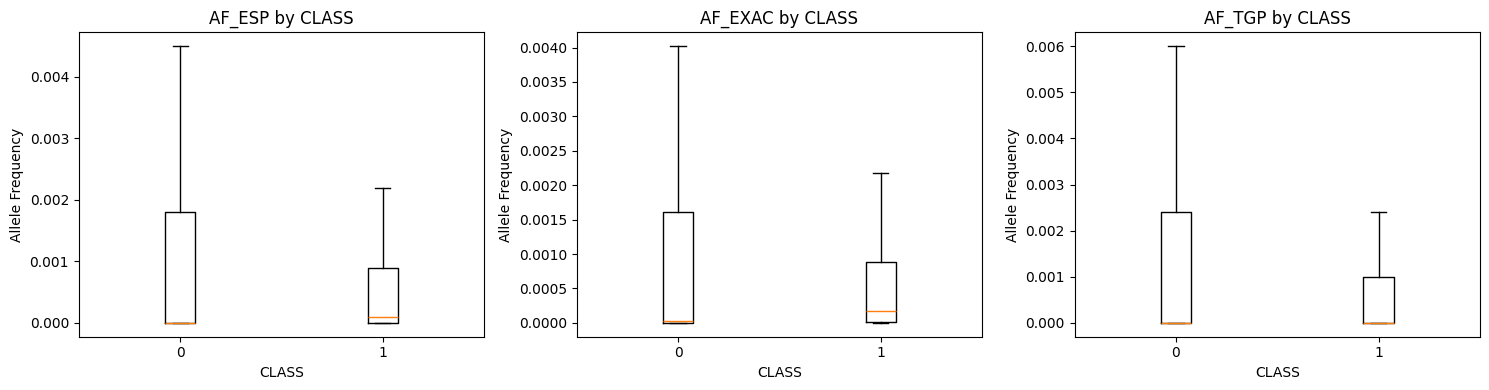

In [40]:
# 7) Allele frequencies
import matplotlib.pyplot as plt
import numpy as np

af_cols = [c for c in ["AF_ESP", "AF_EXAC", "AF_TGP"] if c in df.columns]

# Cast to numeric
for c in af_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    axes[i].hist(df[col].dropna(), bins=60)
    axes[i].set_title(f"{col} distribution")
    axes[i].set_xlabel("Allele Frequency")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Boxplots by CLASS
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(af_cols):
    data0 = df.loc[df["CLASS"] == 0, col].dropna()
    data1 = df.loc[df["CLASS"] == 1, col].dropna()
    axes[i].boxplot([data0, data1], labels=["0", "1"], showfliers=False)
    axes[i].set_title(f"{col} by CLASS")
    axes[i].set_xlabel("CLASS")
    axes[i].set_ylabel("Allele Frequency")

plt.tight_layout()
plt.show()


## Correlació de Variables Numèriques amb CLASS

La matriu de correlació permet analitzar les relacions lineals entre les variables numèriques del dataset, incloent la variable objectiu `CLASS`. Les correlacions observades amb `CLASS` són generalment baixes en valor absolut, fet que indica que no existeix un únic predictor numèric amb forta relació lineal amb la presència de conflicte. Això suggereix que el patró predictiu és probablement multivariable i pot incloure interaccions no lineals entre característiques.

### Observacions Relevants de la Matriu

S’observa una alta correlació positiva entre `CADD_PHRED` i `CADD_RAW`, fet esperable ja que ambdues mesures provenen del mateix sistema d’anotació funcional. De manera similar, les tres freqüències al·lèliques presenten correlacions elevades entre si, atès que descriuen la mateixa propietat en diferents cohorts poblacionals. En canvi, la relació entre aquestes variables i `CLASS` és negativa però moderada, la qual cosa reforça la idea que les variants més freqüents tendeixen a presentar menys conflicte. Globalment, l’absència de correlacions lineals fortes amb la variable objectiu orienta cap a l’ús de models capaços de capturar relacions no lineals i interaccions complexes entre característiques.

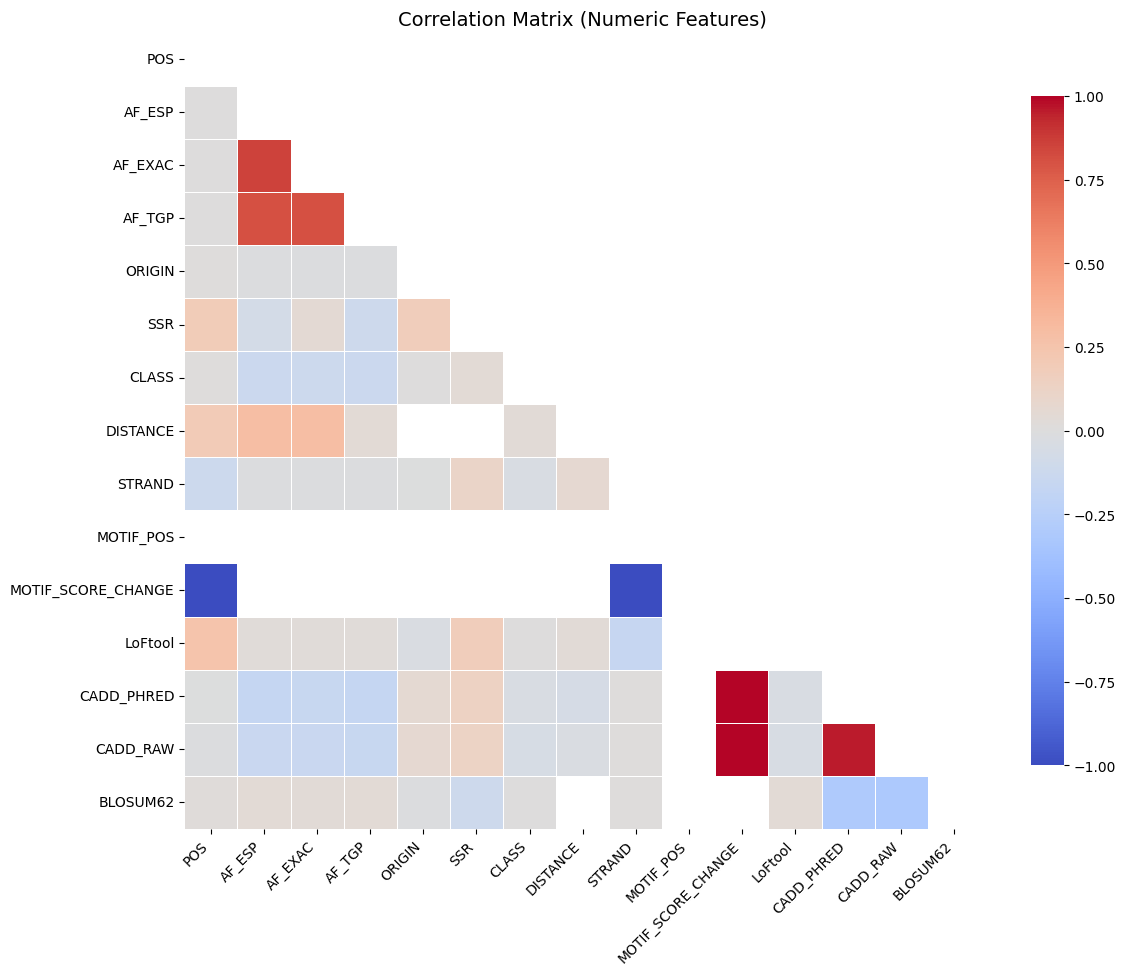

In [ ]:
# Correlation matrix (numeric)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Numeric columns only
num_df = df.select_dtypes(include=[np.number]).copy()
corr = num_df.corr()

# Hide upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    center=0,
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix (Numeric Features)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [42]:
class_corr.head(15)

CLASS                 1.000000
SSR                   0.042410
DISTANCE              0.036865
POS                   0.012061
ORIGIN                0.004357
BLOSUM62              0.001593
LoFtool               0.000045
STRAND               -0.031369
CADD_PHRED           -0.037713
CADD_RAW             -0.053485
AF_EXAC              -0.121213
AF_ESP               -0.126538
AF_TGP               -0.130077
MOTIF_POS                  NaN
MOTIF_SCORE_CHANGE         NaN
Name: CLASS, dtype: float64

## Variables categòriques i taxa de conflicte (CLASS)

En aquesta secció s’analitza com varia la probabilitat de conflicte (`CLASS=1`) en funció de diverses variables categòriques rellevants del dataset. Per a cada categoria es calcula la proporció mitjana de `CLASS=1` (barres blaves), i de manera complementària es mostra el nombre de registres disponibles per categoria (línia taronja). Aquest segon component és important perquè evita interpretar diferències que poden estar dominades per mostres molt petites: una categoria amb una taxa de conflicte alta però amb pocs casos pot ser un artefacte de mostreig, mentre que patrons consistents en categories freqüents són més robustos.

Els gràfics permeten detectar quines variables categòriques tenen una relació més clara amb el conflicte. Per exemple, variables com `CLNVC` (tipus de variant), `IMPACT` (impacte funcional estimat), o anotacions in-silico com `SIFT` i `PolyPhen` poden mostrar canvis de taxa entre categories que suggereixen senyal predictiu. Això és especialment útil perquè aquestes variables no es reflecteixen en una correlació numèrica clàssica, i sovint aporten informació de manera no lineal. Addicionalment, el gràfic de `SYMBOL` pot evidenciar que hi ha gens amb més proporció de conflicte que d’altres, tot i que aquesta interpretació s’ha de fer amb cautela: el conflicte pot estar influenciat pel volum de submissions, la heterogeneïtat de fenotips o la dificultat d’interpretació clínica associada a determinats gens.

Finalment, aquesta anàlisi justifica el tractament acurat de variables categòriques en el modelatge. En particular, categories amb alta cardinalitat (com `SYMBOL`) poden requerir estratègies d’encoding específiques o agregacions (per exemple agrupant categories rares com “Other”), mentre que variables amb poques categories (`IMPACT`, `SIFT`, `PolyPhen`, `BAM_EDIT`) poden beneficiar-se d’un one-hot encoding directe. En conjunt, els resultats indiquen que una part important del senyal per predir conflicte probablement es concentra en característiques categòriques i en interaccions entre anotacions funcionals i context genòmic.

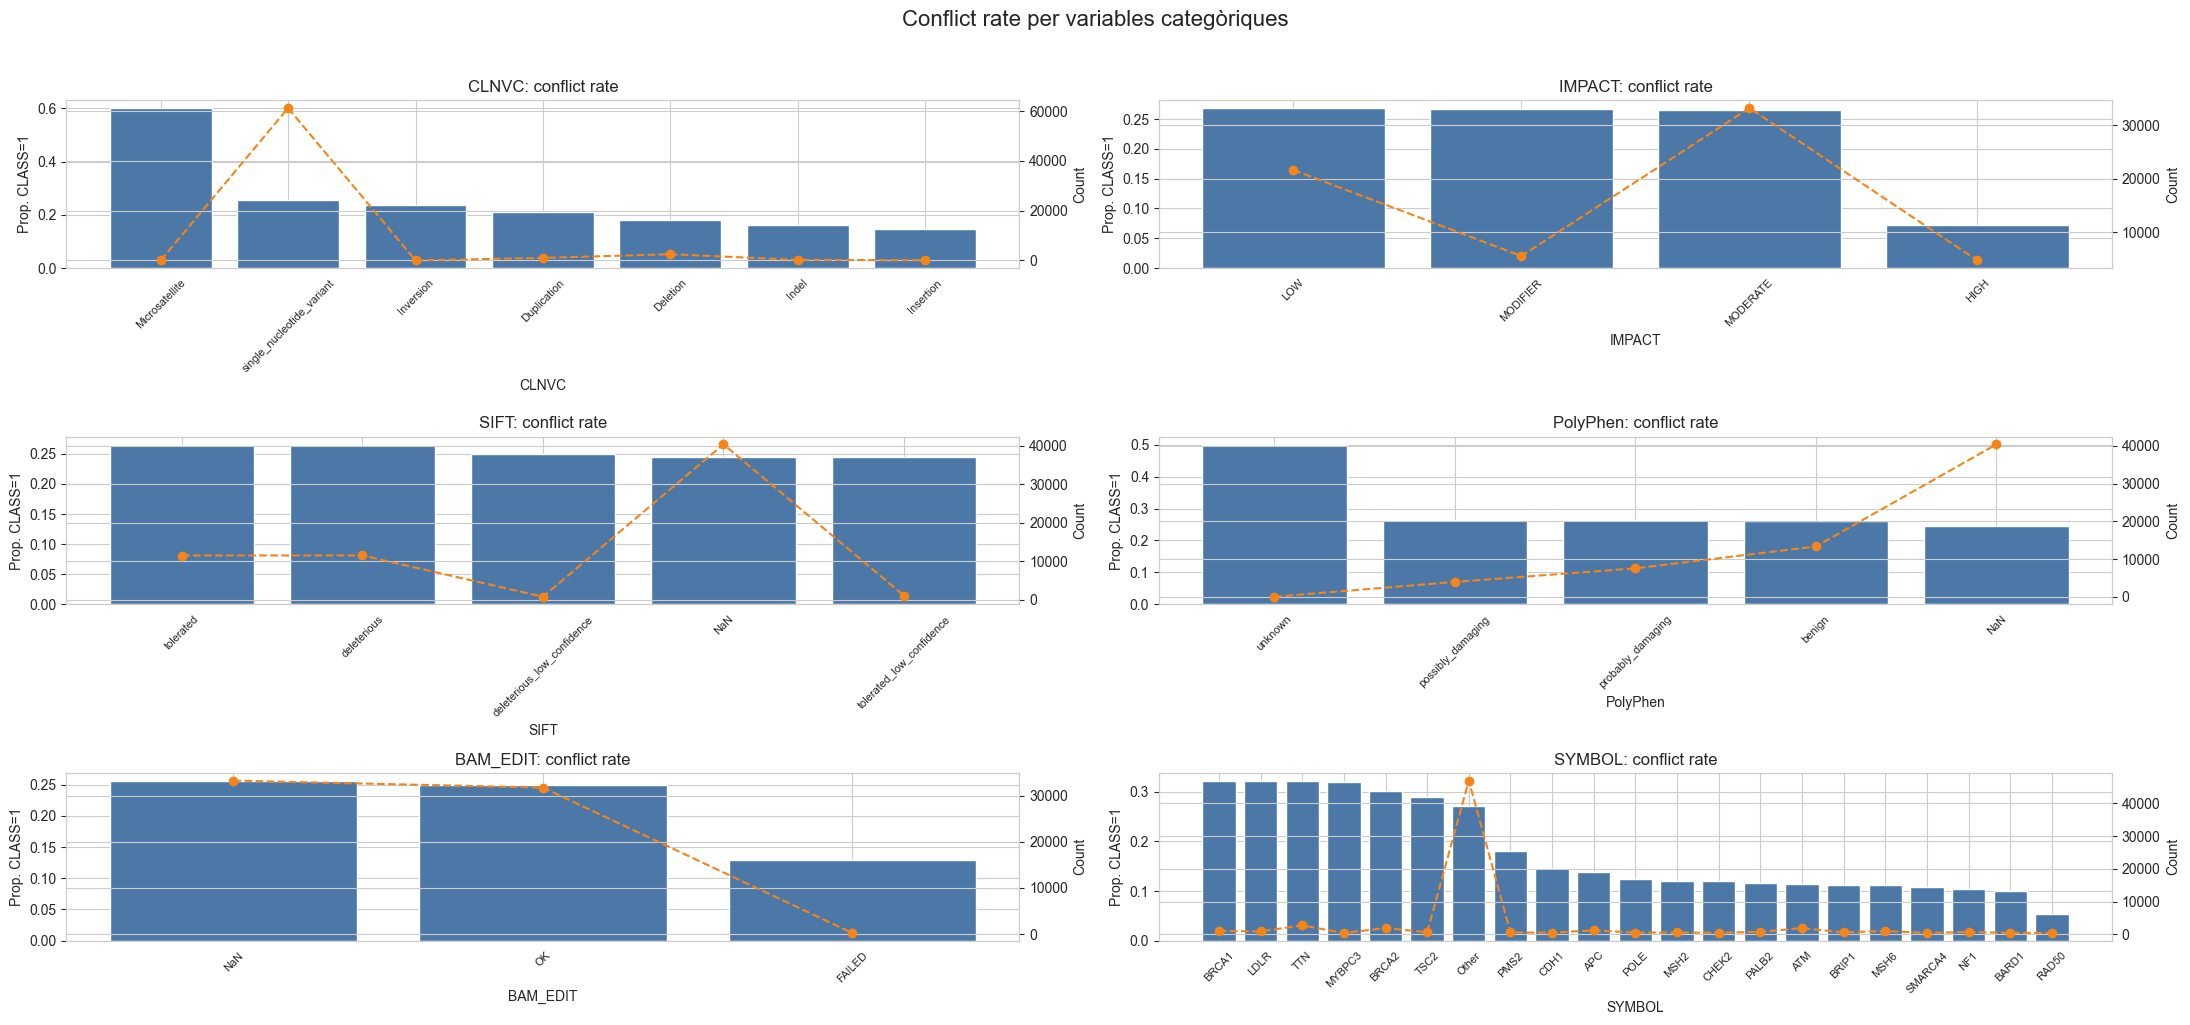

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def plot_conflict_rate_cat(ax, df, col, target="CLASS", top_n=15):
    tmp = df[[col, target]].copy()
    tmp[col] = tmp[col].astype("object").fillna("NaN")

    vc = tmp[col].value_counts()
    if vc.shape[0] > top_n:
        top = vc.head(top_n).index
        tmp[col] = np.where(tmp[col].isin(top), tmp[col], "Other")

    rate = tmp.groupby(col)[target].mean().sort_values(ascending=False)
    cnt = tmp[col].value_counts().reindex(rate.index)

    ax.bar(rate.index.astype(str), rate.values, color="#4C78A8")
    ax.set_title(f"{col}: conflict rate")
    ax.set_ylabel("Prop. CLASS=1")
    ax.set_xlabel(col)
    ax.tick_params(axis="x", rotation=45, labelsize=8)

    ax2 = ax.twinx()
    ax2.plot(range(len(cnt)), cnt.values, marker="o", linestyle="--", color="#F58518", linewidth=1.5)
    ax2.set_ylabel("Count")

# 6 gràfics en graella 2x3
vars_to_plot = [
    ("CLNVC", 10),
    ("IMPACT", 10),
    ("SIFT", 10),
    ("PolyPhen", 10),
    ("BAM_EDIT", 10),
    ("SYMBOL", 20),
]

available = [(c, n) for c, n in vars_to_plot if c in df.columns]

fig, axes = plt.subplots(3, 2, figsize=(22, 10))
axes = axes.flatten()

for i, (col, top_n) in enumerate(available[:6]):
    plot_conflict_rate_cat(axes[i], df, col, top_n=top_n)

# si en falten, amaga els subplots buits
for j in range(len(available[:6]), 6):
    axes[j].axis("off")

fig.suptitle("Conflict rate per variables categòriques", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## Particio de dades (train/validation/test)

Es defineix una particio fixa per garantir comparacions justes entre models:
- 90% per `train_val` i 10% per `test`
- del `train_val`, 10% per `validation`
- mateixa `random_state` en tots els splits

Aquesta particio es mantindra identica per a tots els models del projecte.



In [ ]:
# Data split (fixed for all models)
from sklearn.model_selection import train_test_split

TARGET_COL = "CLASS"
RANDOM_STATE = 42
TEST_SIZE = 0.10
VAL_SIZE_WITHIN_TRAIN = 0.10

X = df.drop(columns=[TARGET_COL])
y = df[TARGET_COL]

# 90% train_val / 10% test
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y,
)

# From train_val, keep 10% for validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val,
    y_train_val,
    test_size=VAL_SIZE_WITHIN_TRAIN,
    random_state=RANDOM_STATE,
    stratify=y_train_val,
)

Data split fixed with random_state=42
This exact split will be reused for all models.
Train: 52802 rows (81.00%)
Validation: 5867 rows (9.00%)
Test: 6519 rows (10.00%)
